In [21]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/mDFNZdzquDo", width=1920/2, height=1080/2)

In [22]:
from qiskit import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
from qiskit.circuit.library import QFT
%matplotlib inline

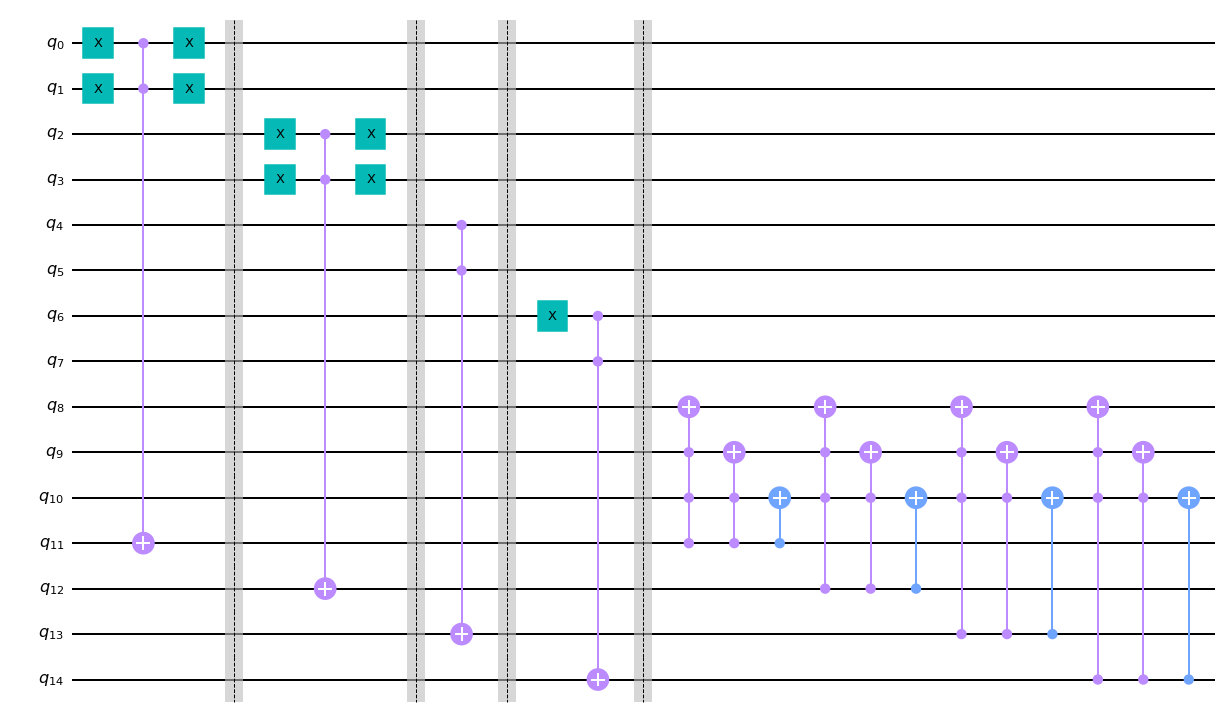

In [33]:
# red -->    00
# orange --> 01
# green -->  10
# yellow --> 11

# user combination --> red, red, yellow, orange

n_qubits = 15

qc_game = QuantumCircuit(n_qubits, name='qc_game')

qc_game.x(range(2)) # red
qc_game.ccx(0,1,11)
qc_game.x(range(2))
qc_game.barrier()

qc_game.x(range(2,4)) # red 
qc_game.ccx(2,3,12)
qc_game.x(range(2,4)) 

qc_game.barrier()

qc_game.ccx(4,5,13) # yellow

qc_game.barrier()

qc_game.x(6) # orange 
qc_game.ccx(6,7,14)
qc_game.barrier()

# +1 to count
qc_game.mct([9,10,11], 8)
qc_game.mct([10,11], 9)
qc_game.cx(11, 10)

qc_game.mct([9,10,12], 8)
qc_game.mct([10,12], 9)
qc_game.cx(12, 10)

qc_game.mct([9,10,13], 8)
qc_game.mct([10,13], 9)
qc_game.cx(13, 10)

qc_game.mct([9,10,14], 8)
qc_game.mct([10,14], 9)
qc_game.cx(14, 10)

qc_game.draw(output="mpl")

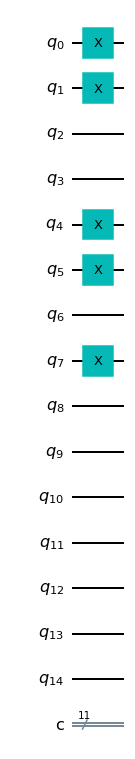

In [42]:
quest = ["yellow", "red", "yellow", "orange"]

colors = {
    "red":(0,0),
    "orange":(0,1),
    "green":(1,0),
    "yellow":(1,1)
    }

quest_operator = QuantumCircuit(n_qubits, n_qubits - 4)

for i, color in enumerate(quest):
    for j,k in enumerate(colors[color]):
        if k == 1:
            quest_operator.x(2*i+j)
            
quest_operator.draw(output="mpl")

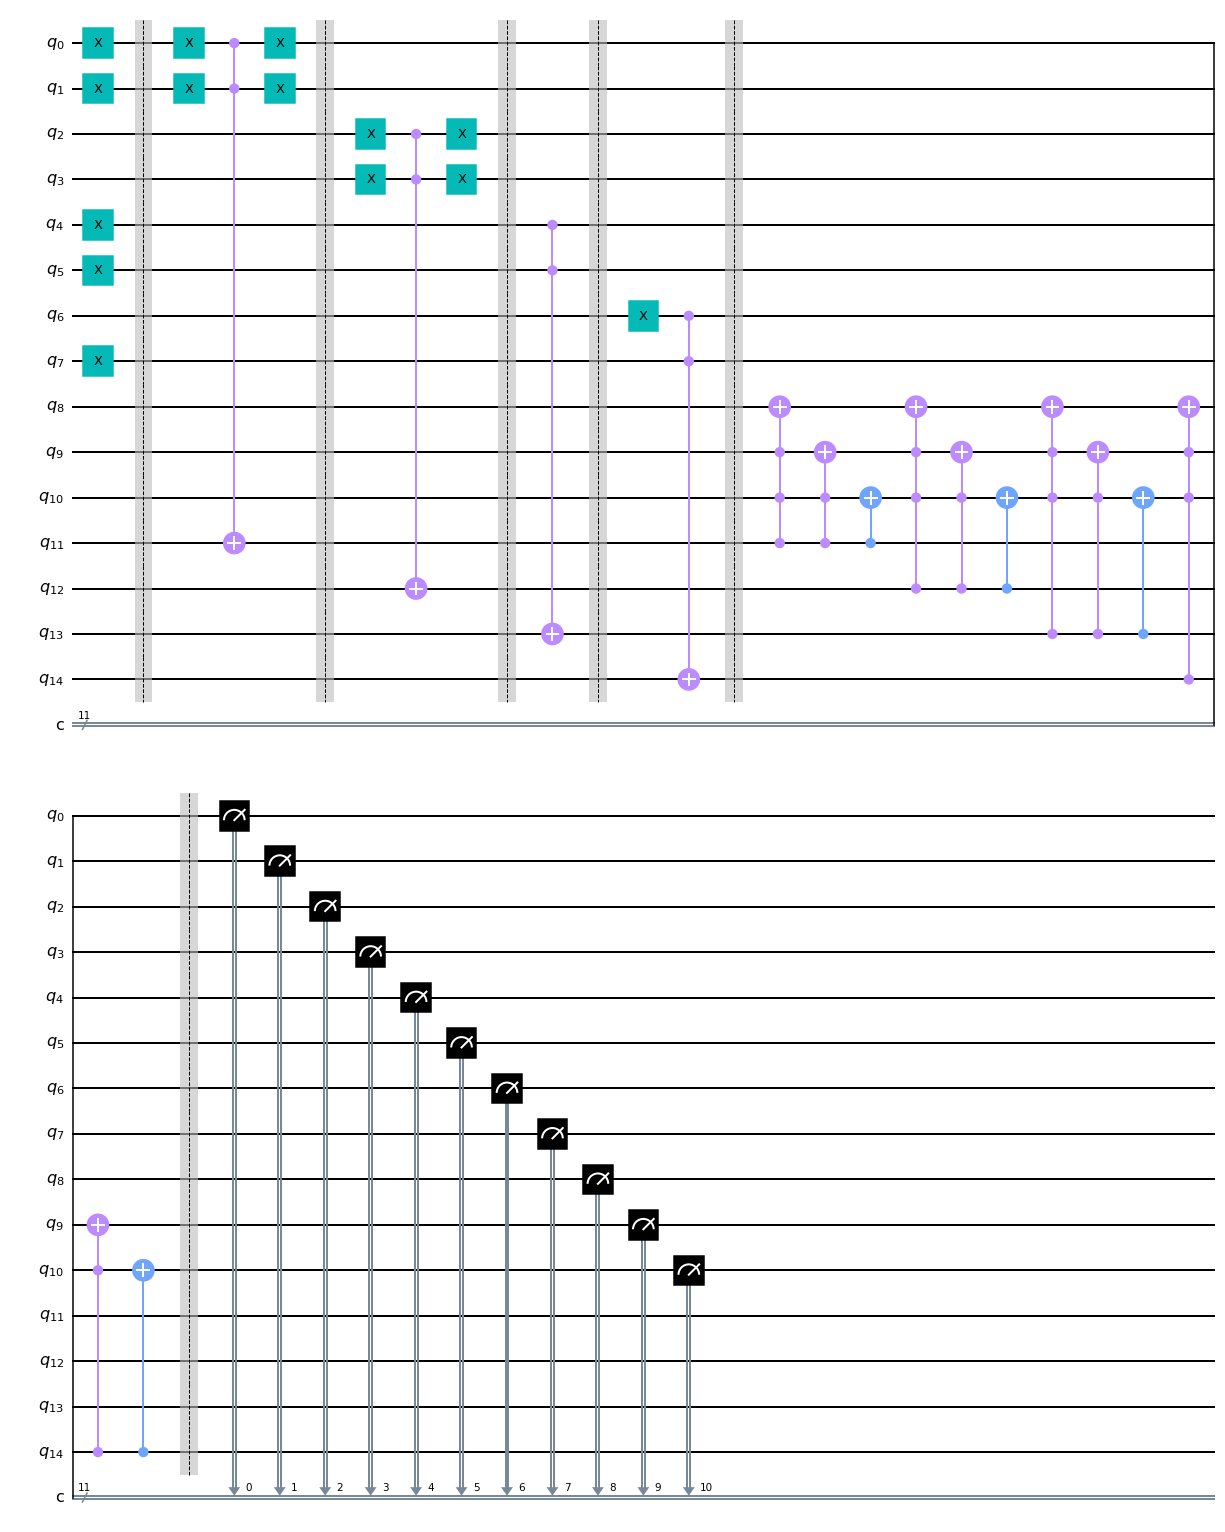

In [43]:
quest_operator.barrier()

circ = quest_operator + qc_game
circ.barrier()
circ.measure(range(11), range(11))
circ.draw(output = 'mpl')

In [44]:
# simulators
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")

sim_counts = qiskit.execute(circ, backend=qasm_sim, shots=1).result().get_counts()

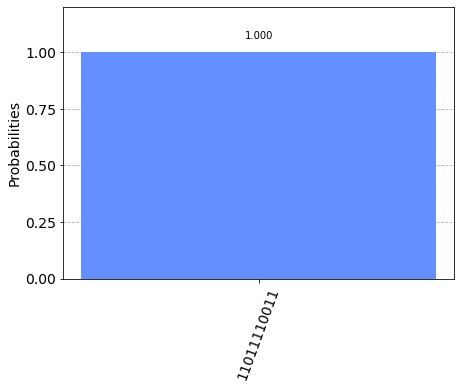

In [45]:
plot_histogram(sim_counts)